# Load libs and date

In [2]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
from lib import *
import os
import soundfile as sf

In [3]:
# Initialize lists to store audio data and sample rates
rir = np.zeros((2, 21, 6), dtype=object) # room impluse response
sr = np.zeros((2, 21, 6), dtype=object) # sample rate

# Load audio files
folder = './data/RIRs/'
for i in range(1, 3):  # speaker
    for j in range(0, 21):  # position
        for k in range(1, 7):  # microphone
            if j < 10:
                file_path = os.path.join(folder,f's{i}_p0{j}_m{k}.wav')
            else:
                file_path = os.path.join(folder,f's{i}_p{j}_m{k}.wav')
            rir[i-1, j, k-1], sr[i-1, j, k-1] = sf.read(file_path)

sr = sr[0,0,0]

print('RIRs loaded')

RIRs loaded


In [4]:
time = np.arange(0, len(rir[0,0,0])) / sr  # Assuming same length for all audio signals
print('sample:',time.size, 'time:', time.size/sr,'s','sample rate:',sr,'Hz')

sample: 144000 time: 3.0 s sample rate: 48000 Hz


# Plot the waveform

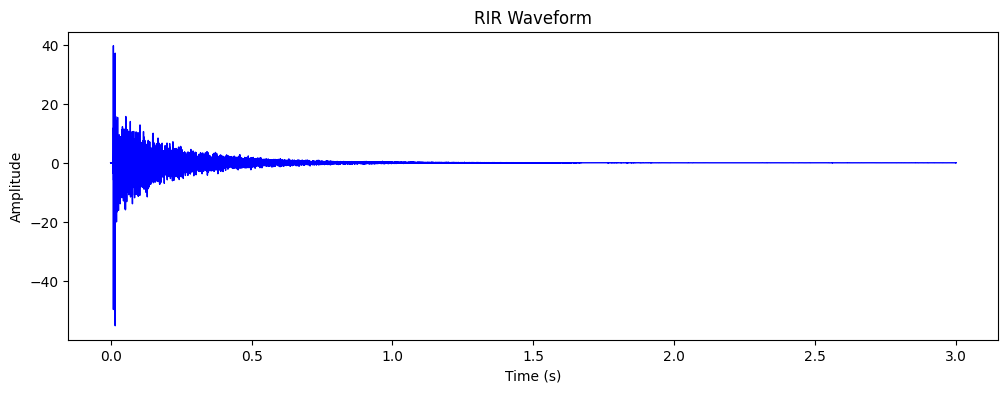

In [5]:
# Plot the waveform with a lighter line style
plt.figure(figsize=(12, 4))
plt.plot(time, rir[0,0,0], linewidth=1, color='b')  # Adjust line width and color
plt.title('RIR Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Set x-axis limits to focus on the beginning of the audio
# plt.xlim(0, 0.15)
plt.savefig('./assets/rir_waveform.png', dpi=300, bbox_inches='tight')
plt.show()

## How to devide early reflections and late reflections?

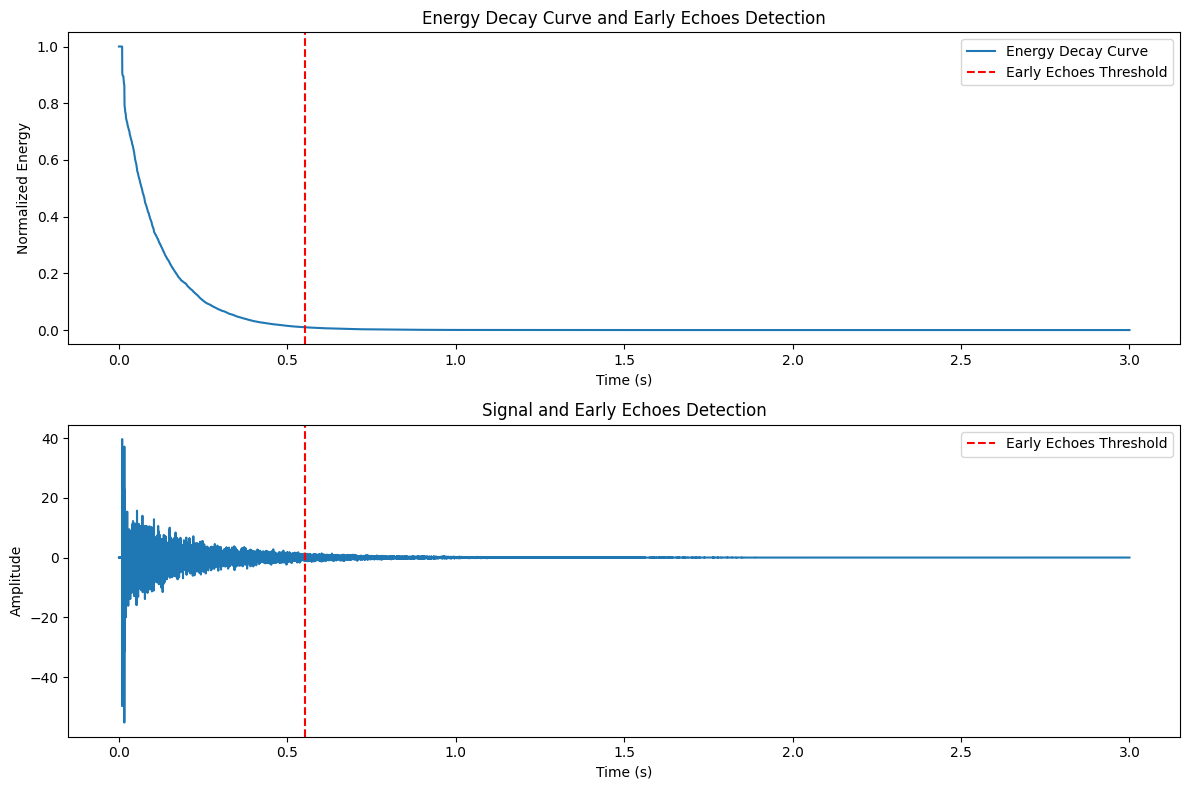

Early Echo Index: 26500
Early Echo Time: 0.5520833333333334 seconds


In [7]:
# 20dB decay
early_echo_index, early_echo_time = edc_analyze(rir[0,0,0], sr,threshold=1e-1, plot=True)

print(f'Early Echo Index: {early_echo_index}')
print(f'Early Echo Time: {early_echo_time} seconds')